In [2]:
import numpy as np 
import pandas as pd

In [4]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')


In [6]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [8]:
df.shape

(271116, 15)

In [10]:
df=df[df['Season']=='Summer']

In [12]:
df.shape

(222552, 15)

In [14]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

In [16]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

In [18]:
df=df.merge(region_df,on="NOC",how='left')

In [20]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [22]:
df['region'].unique().shape

(206,)

In [24]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [26]:
df.duplicated().sum()

1385

In [28]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

In [32]:
df['Medal'].value_counts()   ##catagories the medals

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [34]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)  ## joining the catagorized medal to main dataset

In [36]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  Bronze   Gold  Silver  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False

In [38]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [40]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [42]:
medal_tally

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  
222536       Poland   NaN   False  False   False  
222537       Poland   NaN   False  False   False  
222541       Greece   NaN   False  False   False  

[105636 rows x 20 columns]

In [44]:
##meadl_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [46]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [48]:
medal_tally

region  Gold  Silver  Bronze
0              USA  1035     802     708
1           Russia   592     498     487
2          Germany   444     457     491
3               UK   278     317     300
4           France   234     256     287
..             ...   ...     ...     ...
200        Lesotho     0       0       0
201        Albania     0       0       0
202          Libya     0       0       0
203  Liechtenstein     0       0       0
204        Liberia     0       0       0

[205 rows x 4 columns]

In [50]:
medal_tally['total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [52]:
medal_tally

region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [54]:
years=df['Year'].unique().tolist()

In [56]:
years.sort()

In [58]:
years.insert(0,'overall')

In [60]:
years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [62]:
country=df['region'].unique().tolist()

In [64]:
country.sort()

TypeError: '<' not supported between instances of 'float' and 'str'

In [68]:
country=np.unique(df['region'].dropna().values).tolist()

In [70]:
country.sort()

In [72]:
country.insert(0,'overall')

In [74]:
country

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [76]:
medal_tally

region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [78]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [80]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year == 'Overall'and country =='Overall':
        temp_df=medal_df
    if year == 'Overall'and country !='Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year != 'Overall'and country =='Overall':
        temp_df=medal_df[medal_df['Year']==int(year)]
    if year != 'Overall'and country !='Overall':
        temp_df=medal_df[medal_df(medal_df['Year']==Year) & (medal_df['region']==country)]

    
    if flag==1:
         x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=False).reset_index()
    else:
         x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
         
    x['total']=x['Gold']+x['Silver']+x['Bronze']
    print(x)

In [82]:
fetch_medal_tally(df,year='Overall',country='India')

    Year  Gold  Silver  Bronze  total
0   2016     0       1       1      2
1   2012     0       2       4      6
2   2008     1       0       2      3
3   2004     0       1       0      1
4   2000     0       0       1      1
5   1996     0       0       1      1
6   1992     0       0       0      0
7   1988     0       0       0      0
8   1984     0       0       0      0
9   1980     1       0       0      1
10  1976     0       0       0      0
11  1972     0       0       1      1
12  1968     0       0       1      1
13  1964     1       0       0      1
14  1960     0       1       0      1
15  1956     1       0       0      1
16  1952     1       0       1      2
17  1948     1       0       0      1
18  1936     1       0       0      1
19  1932     1       0       0      1
20  1928     1       0       0      1
21  1924     0       0       0      0
22  1920     0       0       0      0
23  1900     0       2       0      2


In [84]:
medal_df

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  
222536       Poland   NaN   False  False   False  
222537       Poland   NaN   False  False   False  
222541       Greece   NaN   False  False   False  

[105636 rows x 20 columns]

OVERALL ANALYSIS

NO OF EDITIONS

NO OF CITIES

NO OF EVENTS

NO OF ATHLETES

PARTICIPATION NATIONS

In [87]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze   Gold  Silver  
0   NaN   False  False   False  
1   NaN   False  False   False

In [89]:
df['Year'].unique().shape[0]-1

28

In [91]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [93]:
df['Sport'].unique().shape

(52,)

In [95]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [97]:
df['Event'].unique().shape

(651,)

In [99]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [101]:
df['Name'].unique().shape

(116122,)

In [103]:
df['region'].unique().shape

(206,)

In [105]:
## participation nation over  time 
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [107]:
df.drop_duplicates(['Year','region'])

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
198805  121320           Horatio Tertuliano Torrom   M   NaN     NaN     NaN   
203075  123858                 Lloyd Oscar Valberg   M  26.0     NaN     NaN   
209763  127894                 Bruno Julius Wagner   M  25.0   185.0    82.0   
215352  131186                     Antoni Wiwulski   M  35.0     NaN     NaN   
216735  132030                Mariana Dias Ximenes   F  24.0   151.0    48.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
198805       Argentina  ARG  1908 Summer  1908  Summer       London   
203075       Singapore  SGP  1948 Summer  1948  Summer       London   
209763     Switzerland  SUI  1908 Summer  1908  Summer       London   
215352          Poland  POL  1912 Summer  1912  Summer    Stockholm   
216735     Timor Leste  TLS  2008 Summer  2008  Summer      Beijing   

                   Sport                               Event Medal  \
0             Basketball         Basketball Men's Basketball   NaN   
1                   Judo        Judo Men's Extra-Lightweight   NaN   
2               Football             Football Men's Football   NaN   
3             Tug-Of-War         Tug-Of-War Men's Tug-Of-War  Gold   
4              Athletics        Athletics Women's 100 metres   NaN   
...                  ...                                 ...   ...   
198805    Figure Skating        Figure Skating Men's Singles   NaN   
203075         Athletics           Athletics Men's High Jump   NaN   
209763         Athletics        Athletics Men's Hammer Throw   NaN   
215352  Art Competitions  Art Competitions Mixed Sculpturing   NaN   
216735         Athletics          Athletics Women's Marathon   NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
198805    Argentina   NaN   False  False   False  
203075          NaN   NaN   False  False   False  
209763  Switzerland   NaN   False  False   False  
215352       Poland   NaN   False  False   False  
216735  Timor-Leste   NaN   False  False   False  

[2786 rows x 20 columns]

In [109]:
nations_over_time=df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')


In [111]:
nations_over_time.rename(columns={'Year':'Editions','count':'No of countries'},inplace=True)

In [113]:
nations_over_time

Editions  No of countries
28      1896               12
22      1900               31
27      1904               14
26      1906               20
25      1908               22
24      1912               29
23      1920               29
21      1924               45
20      1928               46
19      1932               47
18      1936               49
17      1948               59
16      1952               67
15      1956               71
13      1960               83
11      1964               93
10      1968              111
9       1972              120
12      1976               91
14      1980               80
8       1984              139
7       1988              156
6       1992              168
5       1996              196
4       2000              199
3       2004              200
2       2008              202
1       2012              203
0       2016              204

In [115]:
import plotly.express as px

In [117]:
fig=px.line(nations_over_time, x='Editions',y="No of countries")

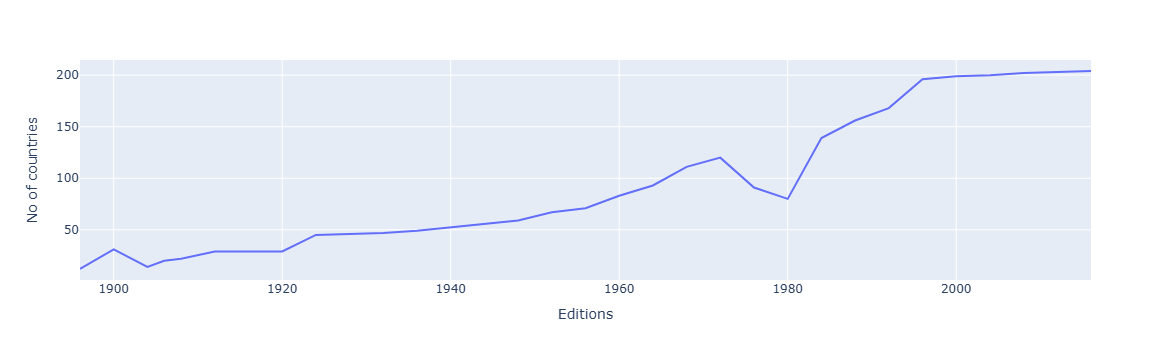

In [119]:
fig.show()

In [121]:
events_over_time=df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [123]:
events_over_time

Year  count
28  1896     43
26  1900     90
25  1904     95
27  1906     74
23  1908    109
24  1912    107
14  1920    158
20  1924    131
22  1928    122
21  1932    131
18  1936    150
15  1948    153
19  1952    149
16  1956    151
17  1960    150
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
1   2008    302
2   2012    302
0   2016    306

In [125]:
import plotly.express as px


In [127]:

fig=px.line(events_over_time, x='Year',y="count")


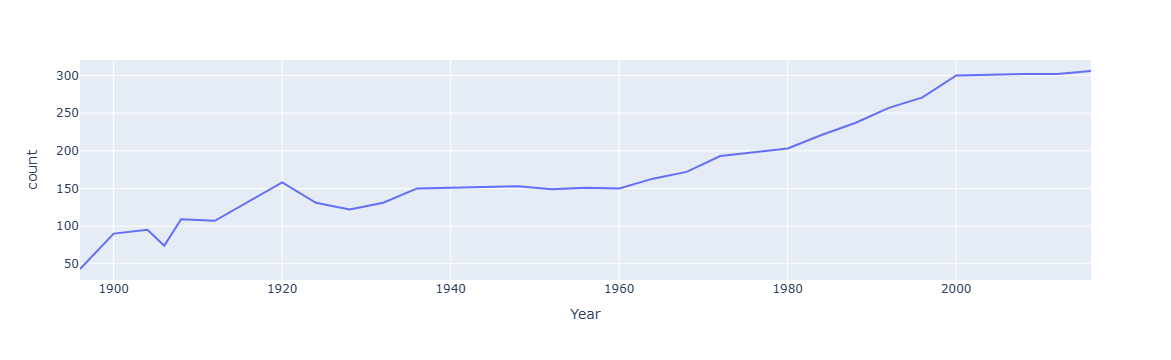

In [129]:
fig.show()

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.copy()  # If df is your main DataFrame




<Axes: xlabel='Year', ylabel='Sport'>

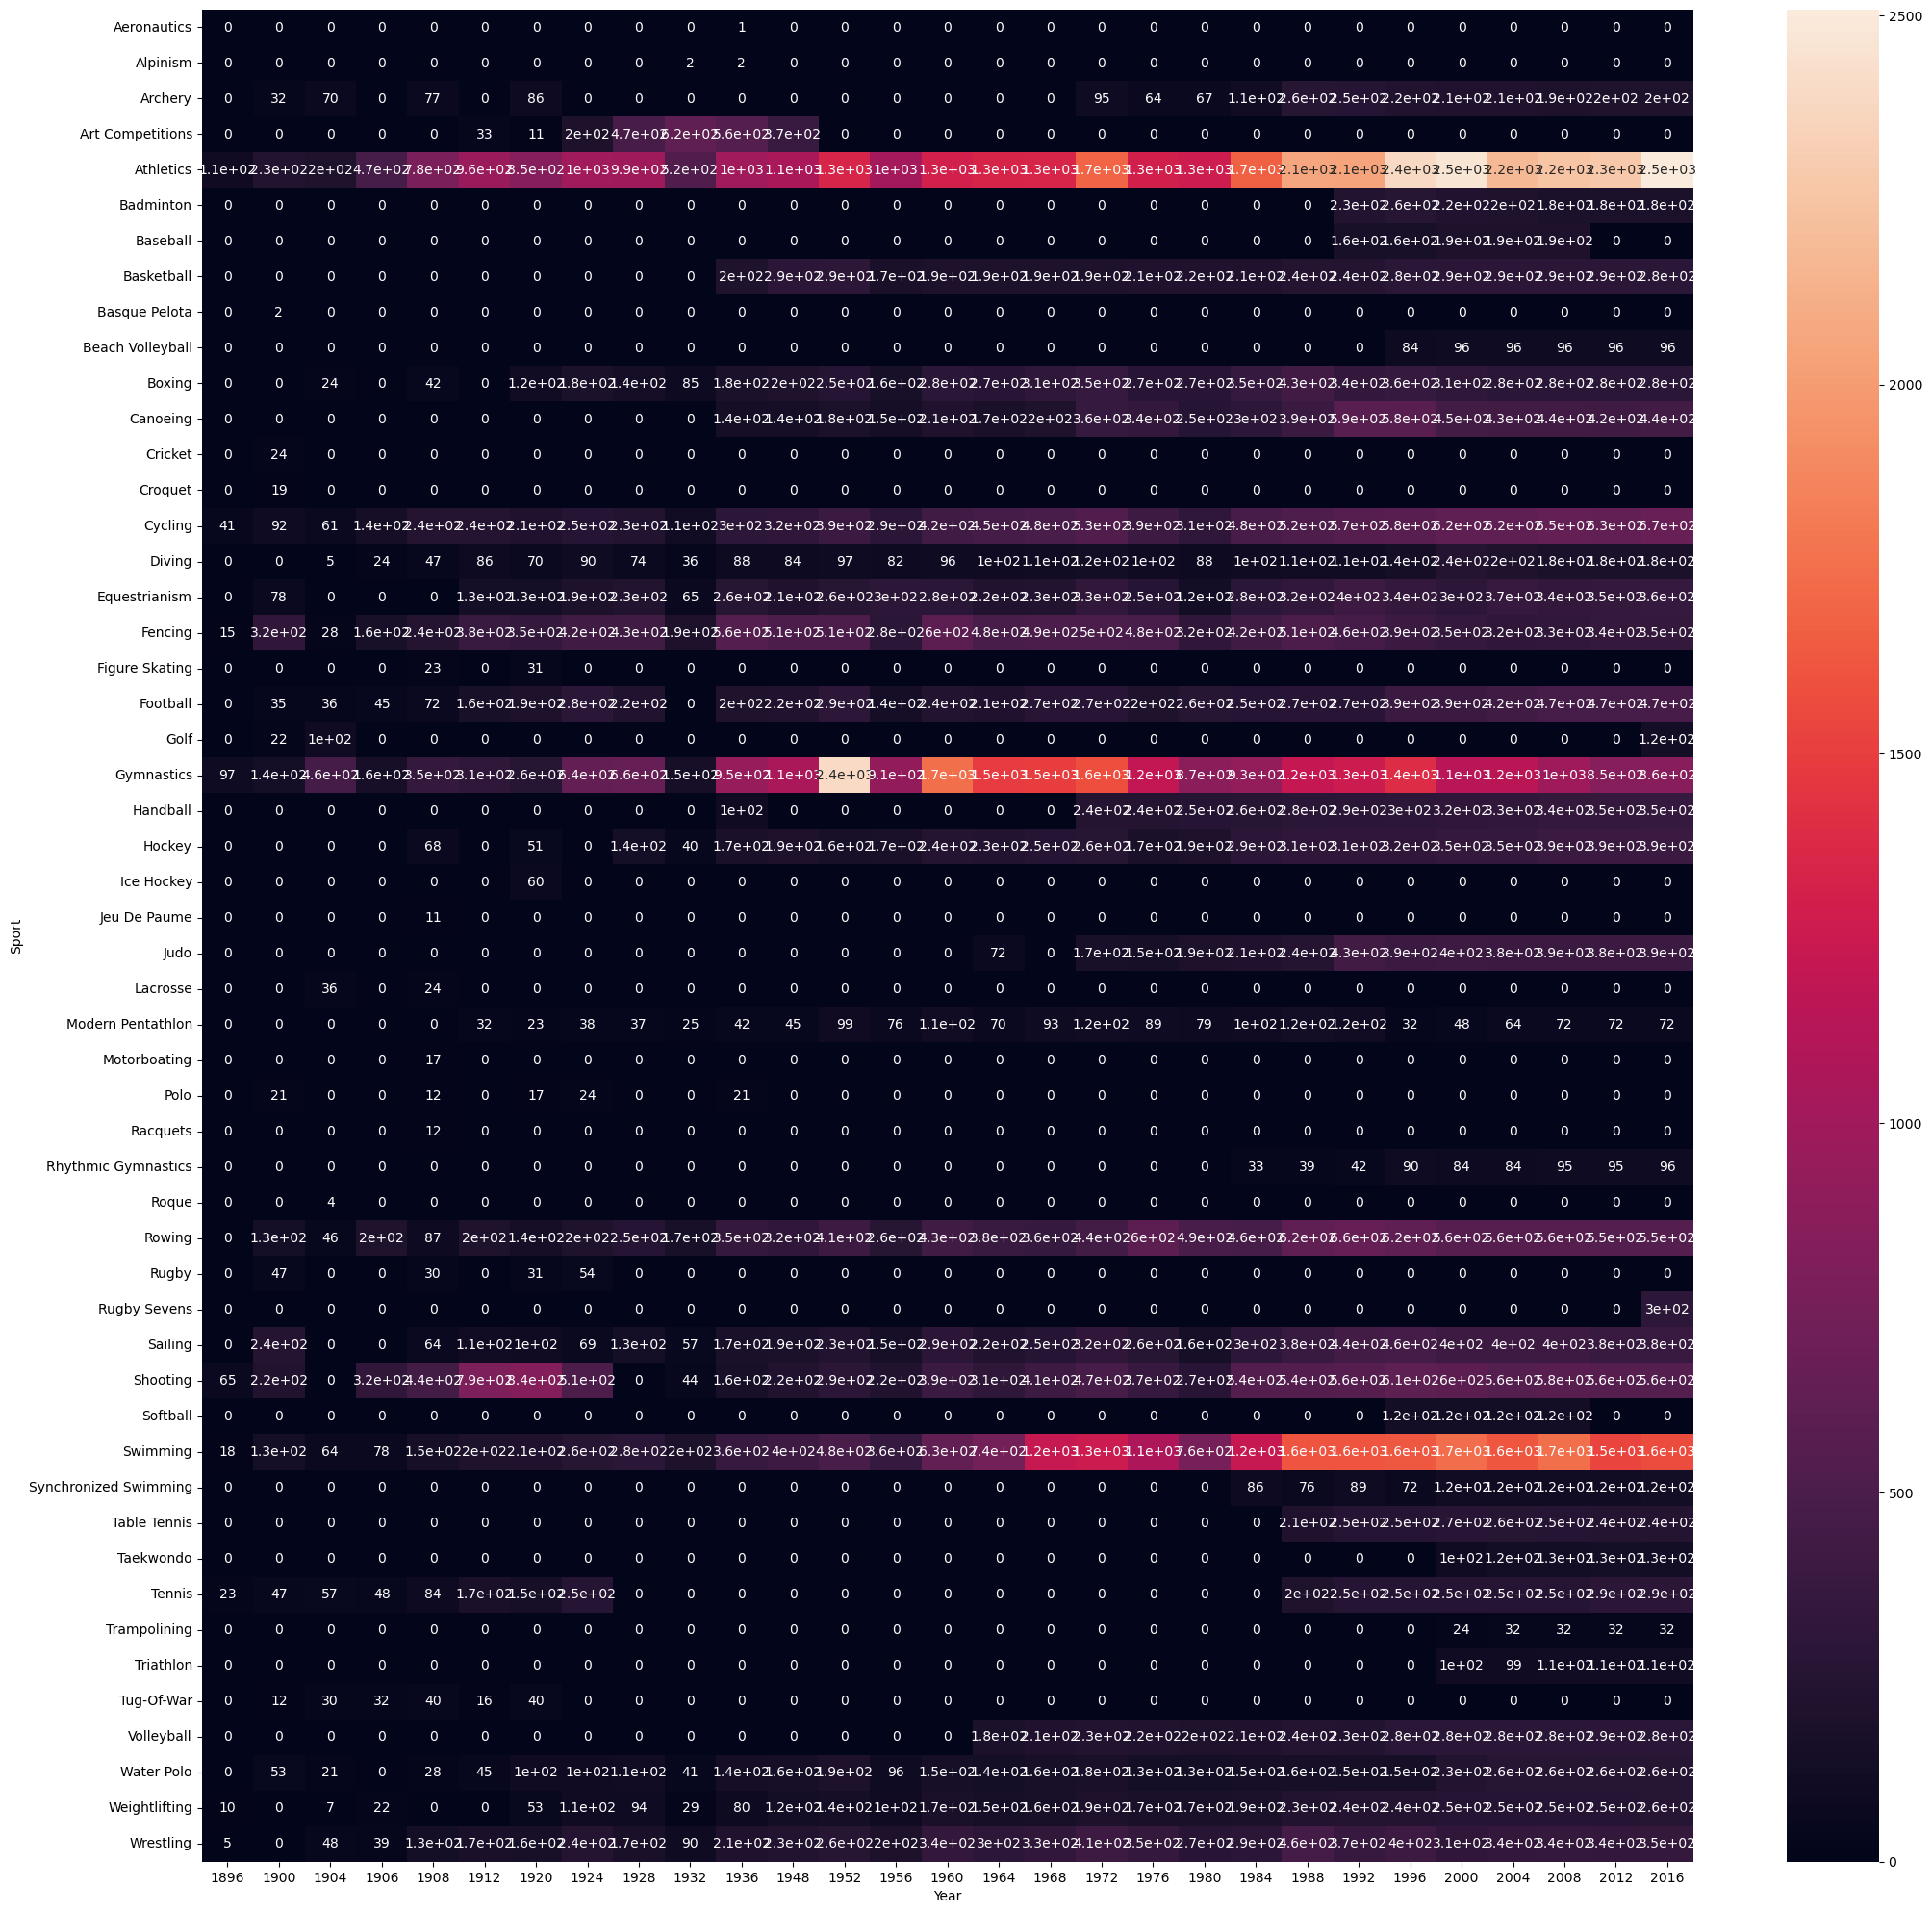

In [133]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [135]:
x=df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

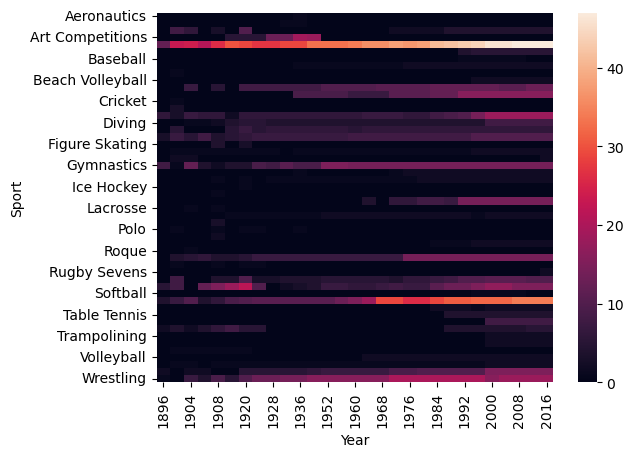

In [137]:
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'))

In [139]:
# Step 1: Drop rows where 'Medal' is NaN
df_medals = df.dropna(subset=['Medal'])

# Step 2: Count the number of times each athlete appears
medal_counts = df_medals['Name'].value_counts().reset_index()
medal_counts.columns = ['Athlete', 'Medal_Count']  # Rename columns for clarity

# Step 3: Merge with original df
merged_df = medal_counts.merge(df, left_on='Athlete', right_on='Name', how='left')

# Step 4: Select required columns and drop duplicates
final_df = merged_df[['Athlete', 'Name', 'Sport', 'region']].drop_duplicates('Athlete')

# Step 5: Display top 10
print(final_df.head(10))


                                             Athlete  \
0                            Michael Fred Phelps, II   
30                Larysa Semenivna Latynina (Diriy-)   
49                      Nikolay Yefimovich Andrianov   
73                       Borys Anfiyanovych Shakhlin   
97                                       Takashi Ono   
130                              Edoardo Mangiarotti   
144             Dara Grace Torres (-Hoffman, -Minas)   
157                          Aleksey Yuryevich Nemov   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)   
195                           Birgit Fischer-Schmidt   

                                                Name       Sport   region  
0                            Michael Fred Phelps, II    Swimming      USA  
30                Larysa Semenivna Latynina (Diriy-)  Gymnastics   Russia  
49                      Nikolay Yefimovich Andrianov  Gymnastics   Russia  
73                       Borys Anfiyanovych Shakhlin  Gymnastics   Russia  
97 

In [141]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])  # Drop rows where 'Medal' is NaN
    if sport != 'Overall':  
        temp_df = temp_df[temp_df['Sport'] == sport]  # Filter by sport if specified

    return temp_df['Name'].value_counts()  # Return medal counts by athlete


In [143]:
most_succesful(df,'Overall')

NameError: name 'most_succesful' is not defined

country wise


-country wise medal tally


-what country are good at heatmap


-most succesful athlete

In [146]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\fakee\AppData\Local\Temp\ipykernel_24140\1749264335.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
new_df=temp_df[temp_df['region']=='USA']
final_df=new_df.groupby("Year").count()['Medal'].reset_index()

In [150]:
fig=px.line(final_df, x='Year',y="Medal")

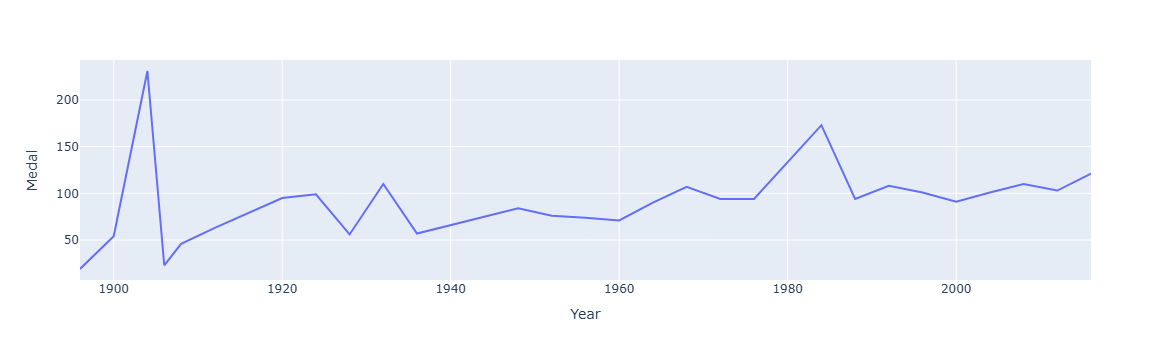

In [152]:
fig.show()

In [154]:
new_df=temp_df[temp_df['region']=='USA']
new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count')

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Archery                 NaN   NaN  16.0   NaN   1.0   NaN   NaN   NaN   NaN   
Art Competitions        NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   
Athletics              16.0  39.0  65.0  22.0  33.0  41.0  29.0  32.0  25.0   
Baseball                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Basketball              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Beach Volleyball        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Boxing                  NaN   NaN  18.0   NaN   NaN   NaN   4.0   6.0   3.0   
Canoeing                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cycling                 NaN   1.0  21.0   NaN   NaN   2.0   NaN   NaN   NaN   
Diving                  NaN   NaN   2.0   NaN   1.0   NaN   8.0  11.0   9.0   
Equestrianism           NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   
Fencing                 NaN   NaN  11.0   NaN   NaN   NaN   1.0   NaN   1.0   
Figure Skating          NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
Football                NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
Golf                    NaN   4.0   5.0   NaN   NaN   NaN   NaN   NaN   NaN   
Gymnastics              NaN   NaN  28.0   NaN   NaN   NaN   NaN   1.0   NaN   
Hockey                  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Ice Hockey              NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
Jeu De Paume            NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   
Judo                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Lacrosse                NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
Modern Pentathlon       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Polo                    NaN   3.0   NaN   NaN   NaN   NaN   1.0   1.0   NaN   
Roque                   NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   
Rowing                  NaN   1.0  13.0   NaN   NaN   NaN   4.0   5.0   5.0   
Rugby                   NaN   1.0   NaN   NaN   NaN   NaN   1.0   1.0   NaN   
Sailing                 NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Shooting                3.0   NaN   NaN   NaN   6.0  14.0  23.0   9.0   NaN   
Softball                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Swimming                NaN   NaN  13.0   1.0   2.0   4.0  16.0  19.0  11.0   
Synchronized Swimming   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Taekwondo               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Tennis                  NaN   3.0   7.0   NaN   NaN   NaN   NaN   6.0   NaN   
Triathlon               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Tug-Of-War              NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   
Volleyball              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Water Polo              NaN   NaN   3.0   NaN   NaN   NaN   NaN   1.0   NaN   
Weightlifting           NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   
Wrestling               NaN   NaN  17.0   NaN   2.0   NaN   6.0   6.0   2.0   

Year                   1932  ...  1976  1984  1988  1992  1996  2000  2004  \
Sport                        ...                                             
Archery                 NaN  ...   2.0   2.0   3.0   NaN   2.0   2.0   NaN   
Art Competitions        7.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Athletics              35.0  ...  22.0  40.0  26.0  30.0  23.0  16.0  25.0   
Baseball                NaN  ...   NaN   NaN   NaN   NaN   1.0   1.0   NaN   
Basketball              NaN  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
Beach Volleyball        NaN  ...   NaN   NaN   NaN   NaN   2.0   1.0   2.0   
Boxing                  5.0  ...   7.0  11.0   8.0   3.0   6.0   4.0   2.0   
Canoeing                NaN  ...   NaN   1.0   2.0   3.0  

<Axes: xlabel='Year', ylabel='Sport'>

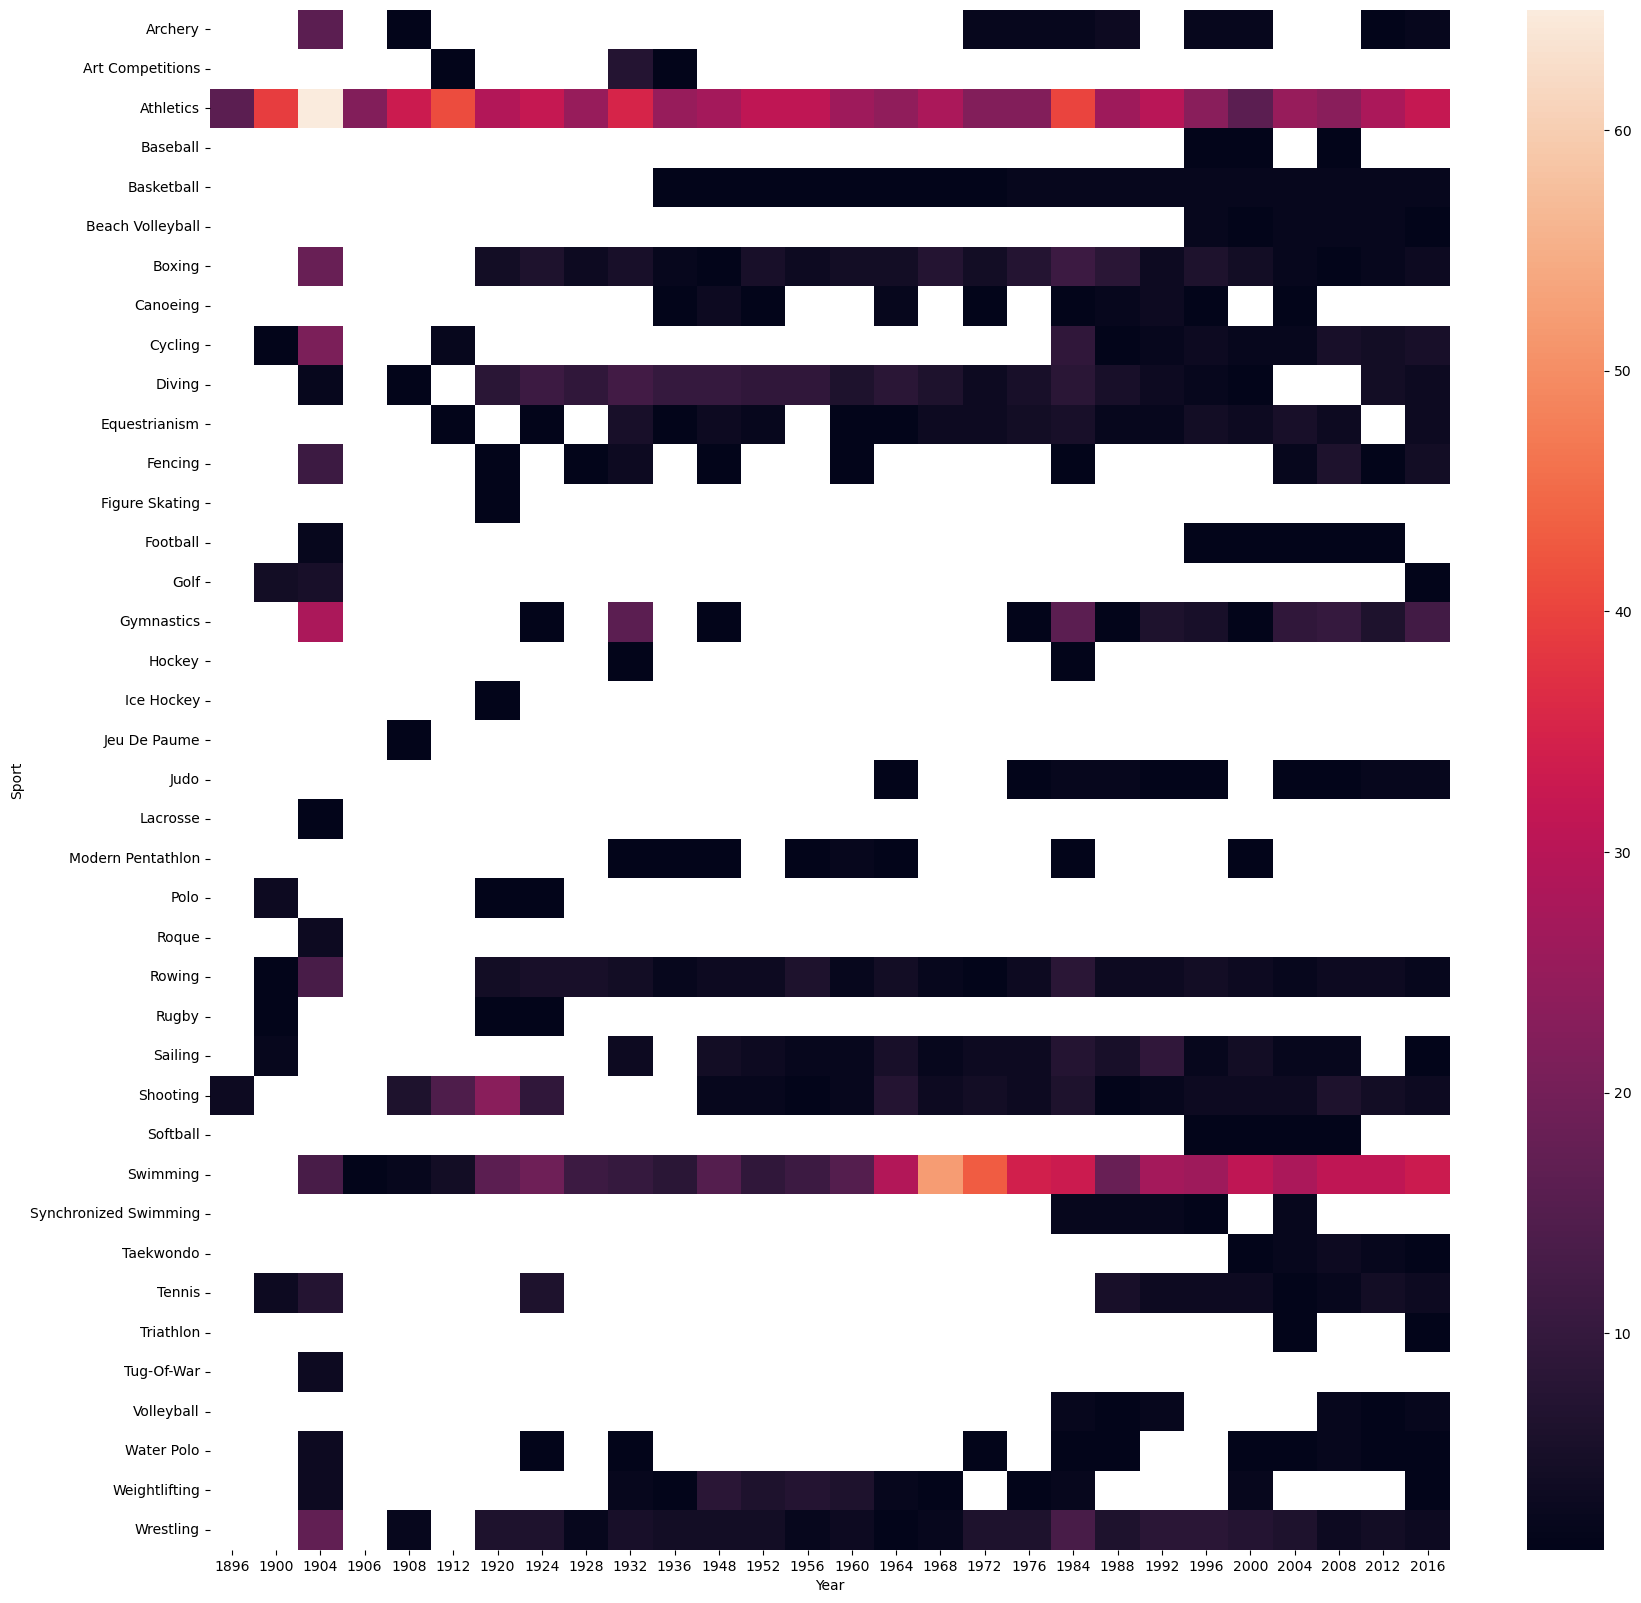

In [156]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count'))

In [181]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])  # Drop rows where 'Medal' is NaN
    
    temp_df = temp_df[temp_df['region'] == country]  # Filter by sport if specified

    x=temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x


In [183]:
most_successful(df,'India')

KeyError: 'index'

ATHLETE ANALYSIS